# В данном блокноте произведена предобработка датасета Vehicle Insurance
## https://www.kaggle.com/datasets/imtkaggleteam/vehicle-insurance-data/data

# Импорт библиотек и датасета

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
# Импортируем датасеты
dataset1 = pd.read_csv('./input/motor_data11-14lats.csv')
dataset2 = pd.read_csv('./input/motor_data14-2018.csv')

In [3]:
# Объединяем датасеты и превращаем их в датафрейм
frames = [dataset1,dataset2]
df = pd.concat(frames)

In [4]:
# Смотрим что содержится в датсете
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


# Обработка данных

## Приводим некатегориальные столбцы в числовой формат

In [5]:
# смотрим информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802036 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes: floa

In [6]:
# приводим столбцы INSR_BEGIN,INSR_END в формат datetime
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'],format='%d-%b-%y')
df['INSR_END'] = pd.to_datetime(df['INSR_END'],format='%d-%b-%y')
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,2013-08-08,2014-08-07,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,2012-08-08,2013-08-07,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,2011-08-08,2012-08-07,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,2011-07-08,2011-08-07,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,2013-08-08,2014-08-07,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [7]:
# Приводим столбец EFFECTIVE_YR к числовому формату
df['EFFECTIVE_YR'] = pd.to_numeric(df['EFFECTIVE_YR'], errors='coerce')
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,2013-08-08,2014-08-07,8.0,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,2012-08-08,2013-08-07,8.0,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,2011-08-08,2012-08-07,8.0,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,2011-07-08,2011-08-07,8.0,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,2013-08-08,2014-08-07,8.0,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [8]:
# смотрим новые типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802036 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SEX                802036 non-null  int64         
 1   INSR_BEGIN         802036 non-null  datetime64[ns]
 2   INSR_END           802036 non-null  datetime64[ns]
 3   EFFECTIVE_YR       801123 non-null  float64       
 4   INSR_TYPE          802036 non-null  int64         
 5   INSURED_VALUE      802036 non-null  float64       
 6   PREMIUM            802015 non-null  float64       
 7   OBJECT_ID          802036 non-null  int64         
 8   PROD_YEAR          801867 non-null  float64       
 9   SEATS_NUM          801801 non-null  float64       
 10  CARRYING_CAPACITY  603837 non-null  float64       
 11  TYPE_VEHICLE       802036 non-null  object        
 12  CCM_TON            802028 non-null  float64       
 13  MAKE               802031 non-null  object       

## Избавляемся от дубликатов

In [9]:
# удаляем дубликаты
print('Размер до удаления дубликатов:', df.shape)
df = df[~df.index.duplicated()]
print('Размер после удаления дубликатов:', df.shape)

Размер до удаления дубликатов: (802036, 16)
Размер после удаления дубликатов: (508499, 16)


## Обрабатываем отрицательные значения

In [10]:
df.describe()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID
count,508499.000000,508499,508499,507946.000000,508499.000000,5.084990e+05,508483.000000,5.084990e+05,508383.000000,508340.000000,385878.000000,508497.000000,3.545400e+04
mean,0.607787,2014-08-09 04:18:12.051704832,2015-07-21 18:42:18.270478848,20.034882,1201.751423,4.898103e+05,7037.319739,5.000528e+09,2005.063733,5.931194,495.423456,3032.095222,2.753431e+05
min,0.000000,2011-07-01 00:00:00,2011-07-13 00:00:00,-9.000000,1201.000000,0.000000e+00,0.000000,5.000018e+09,1950.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2012-08-06 00:00:00,2013-07-10 00:00:00,11.000000,1202.000000,0.000000e+00,667.000000,5.000176e+09,2000.000000,1.000000,0.000000,200.000000,1.309886e+04
50%,1.000000,2014-01-01 00:00:00,2014-12-31 00:00:00,14.000000,1202.000000,1.000000e+05,2696.527000,5.000461e+09,2008.000000,3.000000,6.000000,2446.000000,3.450000e+04
75%,1.000000,2016-10-23 00:00:00,2017-10-12 00:00:00,16.000000,1202.000000,7.000000e+05,8788.610000,5.000863e+09,2013.000000,4.000000,32.600000,4164.000000,1.379961e+05
max,2.000000,2018-06-30 00:00:00,2019-06-29 00:00:00,99.000000,1204.000000,2.500000e+08,542942.150000,5.001351e+09,2018.000000,199.000000,1000000.000000,20000.000000,1.524458e+08
std,0.643921,NaN,NaN,21.118675,0.435290,9.313383e+05,10614.224661,3.781614e+05,10.497639,13.010036,3963.580181,3420.464351,1.745208e+06


In [11]:
#Смотрим отрицательные значения для колонки EFFECTIVE_YR
df.query('EFFECTIVE_YR < 0')

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
1726,1,2013-07-02,2014-07-01,-1.0,1202,0.0,4336.95,5000026811,2007.0,37.0,37.0,Bus,3920.0,HIGER BUS,Fare Paying Passengers,NaN
1727,1,2012-06-15,2013-06-14,-1.0,1202,0.0,4331.70,5000026811,2007.0,37.0,37.0,Bus,3920.0,HIGER BUS,Fare Paying Passengers,3370.00
4646,1,2013-12-01,2014-11-30,-7.0,1201,200000.0,1777.84,5000021637,1996.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,10033.34
4647,1,2012-12-01,2013-11-30,-7.0,1201,200000.0,1782.84,5000021637,1996.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,NaN
4648,1,2011-12-01,2012-11-30,-7.0,1201,200000.0,1436.71,5000021637,1996.0,4.0,NaN,Automobile,1295.0,TOYOTA,Private,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325845,2,2016-06-01,2017-05-31,-1.0,1202,850000.0,8650.93,5000752716,2015.0,0.0,226.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN
325846,2,2015-11-22,2016-05-22,-1.0,1202,850000.0,5599.80,5000752716,2015.0,0.0,226.0,Trailers and semitrailers,0.0,MESFIN,General Cartage,NaN
408148,1,2017-12-31,2018-12-30,-1.0,1201,2300000.0,22786.15,5000921587,2015.0,4.0,NaN,Automobile,1987.0,TOYOTA,Private,NaN
408150,1,2016-12-31,2017-12-30,-1.0,1201,2300000.0,15186.12,5000921587,2015.0,4.0,NaN,Automobile,1987.0,TOYOTA,Private,48914.24


In [12]:
#Заменяем отрицательные значения для колонки EFFECTIVE_YR на модули чисел так как это столбец отвечающий за время действия страховки
print('Отрицательных значений до:', df.loc[df['EFFECTIVE_YR'] < 0,'EFFECTIVE_YR'].count())
df.loc[df['EFFECTIVE_YR'] < 0,'EFFECTIVE_YR'] = abs(df['EFFECTIVE_YR'])
print('Отрицательных значений после:', df.loc[df['EFFECTIVE_YR'] < 0,'EFFECTIVE_YR'].count())

Отрицательных значений до: 157
Отрицательных значений после: 0


## Обрабатываем null и 0 значения

In [13]:
df.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR            553
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  16
OBJECT_ID                 0
PROD_YEAR               116
SEATS_NUM               159
CARRYING_CAPACITY    122621
TYPE_VEHICLE              0
CCM_TON                   2
MAKE                      5
USAGE                     0
CLAIM_PAID           473045
dtype: int64

In [14]:
# Удаляем NULL значения для столбцов с небольшим количеством пустых значений (< 500)
df = df.dropna(subset=['PREMIUM','PROD_YEAR', 'CCM_TON', 'MAKE', 'SEATS_NUM', 'EFFECTIVE_YR'])
df.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              0
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                   0
OBJECT_ID                 0
PROD_YEAR                 0
SEATS_NUM                 0
CARRYING_CAPACITY    122297
TYPE_VEHICLE              0
CCM_TON                   0
MAKE                      0
USAGE                     0
CLAIM_PAID           472329
dtype: int64

In [15]:
# Для столбца CLAIM_PERIOD значения NULL заменяются на 0, так как отсутствие записи означает что выплаты небыло
df['CLAIM_PAID'] = df['CLAIM_PAID'].fillna(0)

In [16]:
# Для столбца CARRYING_CAPACITY значения NULL заменяются на 0 для последующей заменой 0 значений в столбцах медианой
df['CARRYING_CAPACITY'] = df['CARRYING_CAPACITY'].fillna(0)

In [17]:
# Смотрим остались ли NULL значения
df.isnull().sum()

SEX                  0
INSR_BEGIN           0
INSR_END             0
EFFECTIVE_YR         0
INSR_TYPE            0
INSURED_VALUE        0
PREMIUM              0
OBJECT_ID            0
PROD_YEAR            0
SEATS_NUM            0
CARRYING_CAPACITY    0
TYPE_VEHICLE         0
CCM_TON              0
MAKE                 0
USAGE                0
CLAIM_PAID           0
dtype: int64

In [18]:
#Смотрим на количество 0 значений в столбцах
zero_counts = df.apply(lambda x: (x == 0).sum())
zero_counts

SEX                  243873
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR           2400
INSR_TYPE                 0
INSURED_VALUE        231401
PREMIUM                  23
OBJECT_ID                 0
PROD_YEAR                 0
SEATS_NUM             39453
CARRYING_CAPACITY    275185
TYPE_VEHICLE              0
CCM_TON               59708
MAKE                      0
USAGE                     0
CLAIM_PAID           472344
dtype: int64

In [19]:
# Делаем маппинг колонки гендера
df.loc[:,'SEX'] = df['SEX'].map({0: 'Legal Entity', 1: 'Male', 2: 'Female'})
df

C:\Users\Surok\AppData\Local\Temp\ipykernel_22968\35151181.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Legal Entity' 'Legal Entity' 'Legal Entity' ... 'Legal Entity'
 'Legal Entity' 'Legal Entity']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'SEX'] = df['SEX'].map({0: 'Legal Entity', 1: 'Male', 2: 'Female'})


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Legal Entity,2013-08-08,2014-08-07,8.0,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
1,Legal Entity,2012-08-08,2013-08-07,8.0,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
2,Legal Entity,2011-08-08,2012-08-07,8.0,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
3,Legal Entity,2011-07-08,2011-08-07,8.0,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
4,Legal Entity,2013-08-08,2014-08-07,8.0,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,Legal Entity,2018-02-02,2019-02-01,12.0,1202,0.00,294.510,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508495,Legal Entity,2018-02-02,2019-02-01,12.0,1202,0.00,299.510,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508496,Legal Entity,2018-02-02,2019-02-01,12.0,1202,0.00,294.510,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508497,Legal Entity,2018-02-02,2019-02-01,12.0,1202,0.00,294.510,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00


In [20]:
# Делаем маппинг типа страхования
df.loc[:,'INSR_TYPE'] = df['INSR_TYPE'].map({1201: 'Private', 1202: 'Commercial', 1204: 'Motor Trade Road Risk'})
df

C:\Users\Surok\AppData\Local\Temp\ipykernel_22968\1135987895.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Commercial' 'Commercial' 'Commercial' ... 'Commercial' 'Commercial'
 'Commercial']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'INSR_TYPE'] = df['INSR_TYPE'].map({1201: 'Private', 1202: 'Commercial', 1204: 'Motor Trade Road Risk'})


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
1,Legal Entity,2012-08-08,2013-08-07,8.0,Commercial,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
2,Legal Entity,2011-08-08,2012-08-07,8.0,Commercial,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
3,Legal Entity,2011-07-08,2011-08-07,8.0,Commercial,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
4,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,Legal Entity,2018-02-02,2019-02-01,12.0,Commercial,0.00,294.510,5001350484,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508495,Legal Entity,2018-02-02,2019-02-01,12.0,Commercial,0.00,299.510,5001350489,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508496,Legal Entity,2018-02-02,2019-02-01,12.0,Commercial,0.00,294.510,5001350498,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508497,Legal Entity,2018-02-02,2019-02-01,12.0,Commercial,0.00,294.510,5001350502,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00


In [21]:
#В поле SEX значение 0 является нормальным, так как оно будет мапится далее
#Так как в данном датасете нет полного описания колонки EFFECTIVE_YR, то просто удаляем записи с 0 значением для данной колонки
df.drop(df.loc[df['EFFECTIVE_YR']==0].index, inplace=True)

In [22]:
# Для колонки стоимости автомобиля берем среднее медианное значение ориентируясь на другие похожие записи
median = df.groupby(['TYPE_VEHICLE','MAKE', 'PROD_YEAR'])['INSURED_VALUE'].transform('median')[0]

# заменяем нули медианой для стоимости автомобиля
df['INSURED_VALUE'] = df['INSURED_VALUE'].replace(0, median)

In [23]:
# удаляем нули в колонке PREMIUM
df.drop(df.loc[df['PREMIUM']==0].index, inplace=True)

In [24]:
# Для колонки  количества мест автомобиля берем среднее медианное значение ориентируясь на другие похожие записи
median_seats_type = df.groupby('TYPE_VEHICLE')['SEATS_NUM'].transform('median')[0]

# заменяем нули медианой для каждого количества мест в автомобиле
df['SEATS_NUM'] = df['SEATS_NUM'].replace(0, median_seats_type)

In [25]:
# Для колонки CCM_TON берем среднее медианное значение ориентируясь на другие похожие записи
median_CCM = df.groupby(['TYPE_VEHICLE','MAKE', 'PROD_YEAR'])['CCM_TON'].transform('median')[0]
# заменяем нули медианой для вместимости автомобиля
df['CCM_TON'] = df['CCM_TON'].replace(0, median_CCM)

In [26]:
# Для колонки вместимости автомобиля берем среднее медианное значение ориентируясь на другие похожие записи
median_carrying_capacity = df.groupby(['TYPE_VEHICLE','MAKE'])['CARRYING_CAPACITY'].transform('median')[0]
# заменяем нули медианой для вместимости автомобиля
df['CARRYING_CAPACITY'] = df['CARRYING_CAPACITY'].replace(0, median_carrying_capacity)

In [27]:
# Смотрим сколько нулей осталось в датафрейме
zero_counts = df.apply(lambda x: (x == 0).sum())
zero_counts

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              0
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                   0
OBJECT_ID                 0
PROD_YEAR                 0
SEATS_NUM                 0
CARRYING_CAPACITY         0
TYPE_VEHICLE              0
CCM_TON                   0
MAKE                      0
USAGE                     0
CLAIM_PAID           470219
dtype: int64

In [28]:
# Повторно смотрим распределение данных в датасете
df.describe()

,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID
count,505339,505339,505339.000000,5.053390e+05,505339.000000,5.053390e+05,505339.000000,505339.000000,505339.000000,505339.000000,5.053390e+05
mean,2014-08-11 07:14:11.530555904,2015-07-23 21:04:05.583262208,20.131249,7.146760e+05,7037.735694,5.000530e+09,2005.069308,6.248026,380.852078,3403.702955,1.918315e+04
min,2011-07-01 00:00:00,2011-07-13 00:00:00,1.000000,1.000000e+00,0.740000,5.000018e+09,1950.000000,1.000000,1.000000,0.500000,0.000000e+00
25%,2012-08-07 00:00:00,2013-07-11 00:00:00,11.000000,4.931063e+05,667.000000,5.000177e+09,2000.000000,2.000000,7.000000,1295.000000,0.000000e+00
50%,2014-01-01 00:00:00,2014-12-31 00:00:00,14.000000,4.931063e+05,2678.820000,5.000464e+09,2008.000000,4.000000,7.000000,2835.000000,0.000000e+00
75%,2016-10-27 00:00:00,2017-10-14 00:00:00,16.000000,7.000000e+05,8783.510000,5.000864e+09,2013.000000,4.000000,10.000000,4164.000000,0.000000e+00
max,2018-06-30 00:00:00,2019-06-29 00:00:00,99.000000,2.500000e+08,542942.150000,5.001351e+09,2018.000000,199.000000,1000000.000000,20000.000000,1.524458e+08
std,NaN,NaN,21.121974,8.417778e+05,10620.441537,3.780444e+05,10.499448,12.938487,3467.120980,3238.577790,4.671623e+05


In [29]:
# Повторно смотрим на структуру датасета
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
1,Legal Entity,2012-08-08,2013-08-07,8.0,Commercial,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
2,Legal Entity,2011-08-08,2012-08-07,8.0,Commercial,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
3,Legal Entity,2011-07-08,2011-08-07,8.0,Commercial,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
4,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [30]:
# Создаем копию датасета перед дальнейшей аналитикой
df_checkpoint1 = df.copy()

# Аналитика данных

In [31]:
# Повторно смотрим на структуру датасета
df.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
1,Legal Entity,2012-08-08,2013-08-07,8.0,Commercial,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
2,Legal Entity,2011-08-08,2012-08-07,8.0,Commercial,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
3,Legal Entity,2011-07-08,2011-08-07,8.0,Commercial,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
4,Legal Entity,2013-08-08,2014-08-07,8.0,Commercial,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


## Удаляем выбросы

### Смотрим распредление данных для колонки INSR_BEGIN

<Axes: ylabel='INSR_BEGIN'>

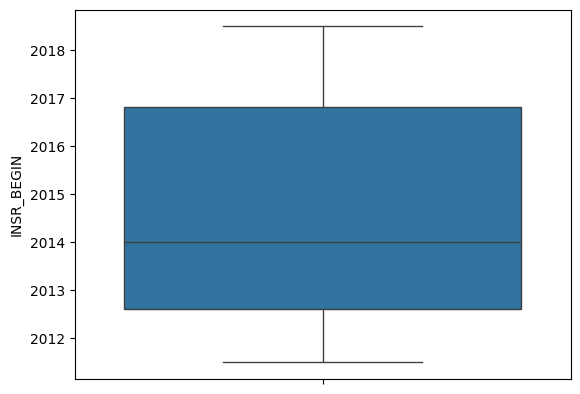

In [32]:
sns.boxplot(df['INSR_BEGIN'])


Выбросов в колонке нет, обработку можно пропустить

### Смотрим распредление данных для колонки INSR_END

<Axes: ylabel='INSR_END'>

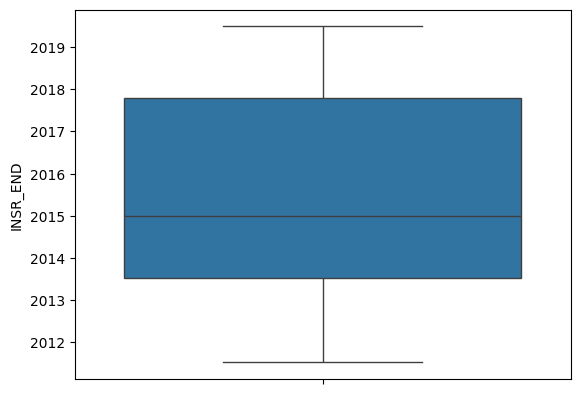

In [33]:
sns.boxplot(df['INSR_END'])

Выбросов в колонке нет, обработку можно пропустить

### Смотрим распредление данных для колонки EFFECTIVE_YR

{'whiskers': [<matplotlib.lines.Line2D at 0x12601796230>,
 'caps': [<matplotlib.lines.Line2D at 0x12601796770>,
 'boxes': [<matplotlib.lines.Line2D at 0x12601795f90>],
 'medians': [<matplotlib.lines.Line2D at 0x12601796cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12601796f50>],
 'means': []}

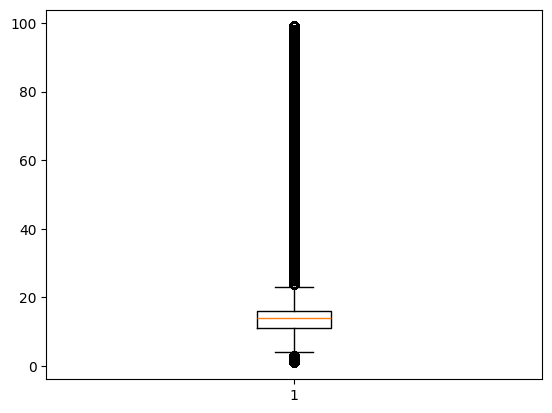

In [34]:
plt.boxplot(df['EFFECTIVE_YR'])

Выбросов в колонке нет, обработку можно пропустить

### Смотрим распредление данных для колонки INSURED_VALUE

{'whiskers': [<matplotlib.lines.Line2D at 0x12601825060>,
 'caps': [<matplotlib.lines.Line2D at 0x126018255a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12601824dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x12601825ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12601825d80>],
 'means': []}

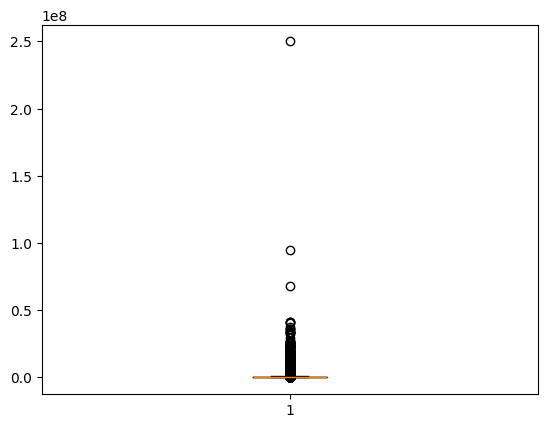

In [35]:
plt.boxplot(df['INSURED_VALUE'])

<Axes: xlabel='INSURED_VALUE', ylabel='Count'>

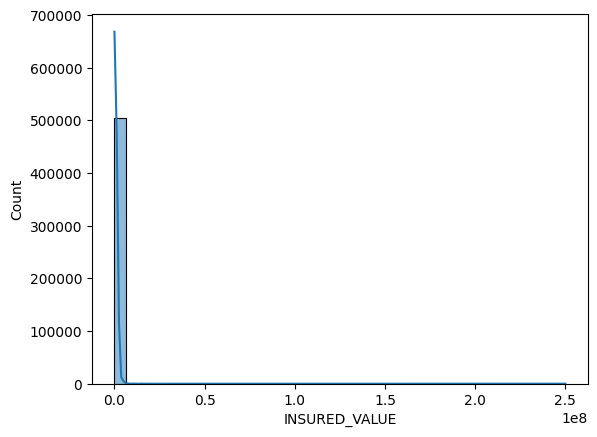

In [36]:
sns.histplot(data=df, x='INSURED_VALUE', bins = 40, kde=True)

Имеются выбросы, обрабатываем их

In [37]:
df[['PREMIUM', 'INSURED_VALUE']].corr()

,PREMIUM,INSURED_VALUE
PREMIUM,1.000000,0.574084
INSURED_VALUE,0.574084,1.000000


In [38]:
#  удаляем выбросы используя метод Z-score
print('До удаления выбросов:', len(df))

Q1 = df['INSURED_VALUE'].quantile(q=.25)
Q3 = df['INSURED_VALUE'].quantile(q=.75)

IQR = Q3 - Q1
 
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

#Выбросы
df_outlines = (df['INSURED_VALUE'] < lower_bound) | (df['INSURED_VALUE'] > upper_bound)

# Удаляем выбросы
df = df.loc[~df_outlines]

print('После удаления выбросов:', len(df))

До удаления выбросов: 505339
Нижняя граница: 182765.77499999997
Верхняя граница: 1010340.535
После удаления выбросов: 382772


In [39]:
df[['PREMIUM', 'INSURED_VALUE']].corr()

,PREMIUM,INSURED_VALUE
PREMIUM,1.000000,0.387436
INSURED_VALUE,0.387436,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x126056e2620>,
 'caps': [<matplotlib.lines.Line2D at 0x126056e3ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x126056e3820>],
 'medians': [<matplotlib.lines.Line2D at 0x126056a8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x126056a8700>],
 'means': []}

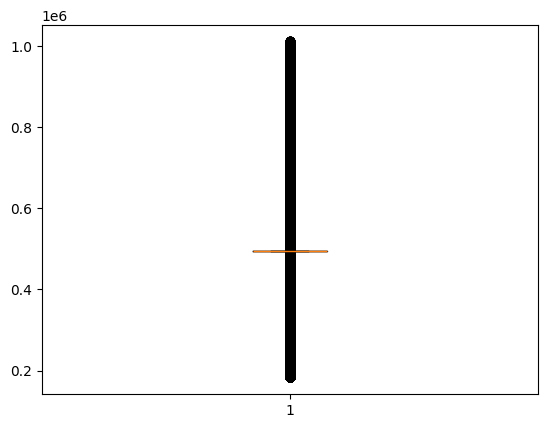

In [40]:
# Строим распредление после удаления выбросов
plt.boxplot(df['INSURED_VALUE'])

C:\Users\Surok\AppData\Local\Temp\ipykernel_22968\3148819780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.INSURED_VALUE)


<Axes: xlabel='INSURED_VALUE', ylabel='Density'>

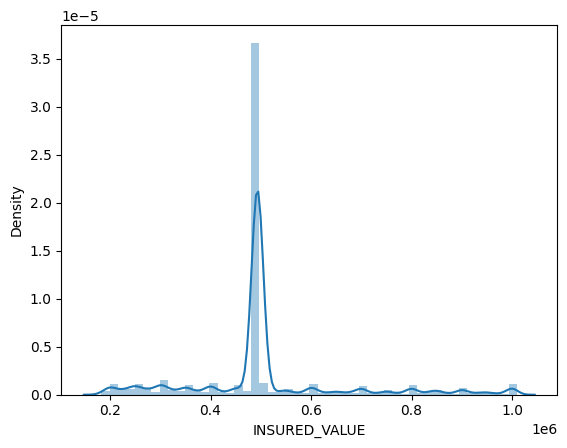

In [41]:
#Строим график после удаления выбросов
sns.distplot(df.INSURED_VALUE)

### Смотрим распределение данных для колонки PREMIUM

{'whiskers': [<matplotlib.lines.Line2D at 0x126072b9900>,
 'caps': [<matplotlib.lines.Line2D at 0x126072b9e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x126072b9660>],
 'medians': [<matplotlib.lines.Line2D at 0x126072ba380>],
 'fliers': [<matplotlib.lines.Line2D at 0x126072ba620>],
 'means': []}

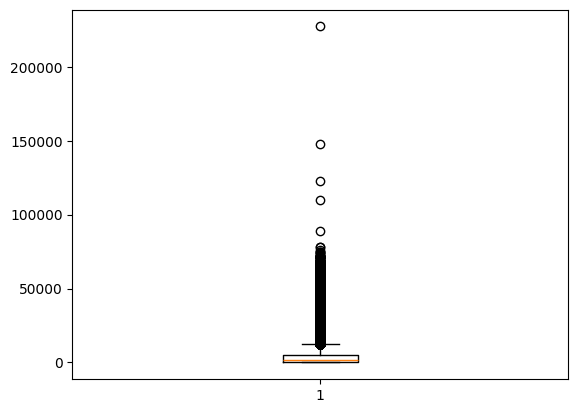

In [42]:
plt.boxplot(df['PREMIUM'])

<Axes: xlabel='PREMIUM', ylabel='Count'>

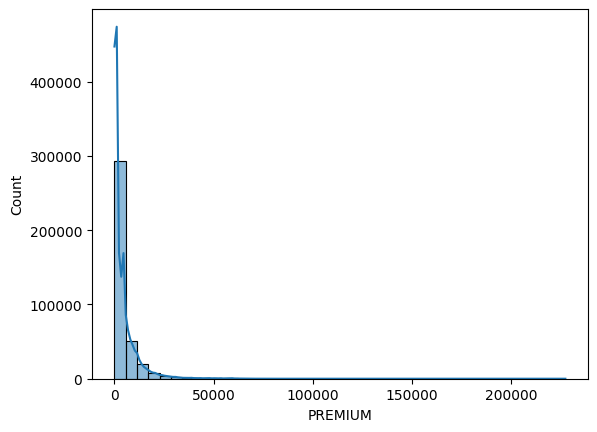

In [43]:
sns.histplot(data=df, x='PREMIUM', bins = 40, kde=True)

Имеются выбросы, обрабатываем их

In [44]:
#  удаляем выбросы используя метод Z-score
print('До удаления выбросов:', len(df))

Q1 = df['PREMIUM'].quantile(q=.25)
Q3 = df['PREMIUM'].quantile(q=.75)

IQR = Q3 - Q1
 
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

#Выбросы
df_outlines = (df['PREMIUM'] < lower_bound) | (df['PREMIUM'] > upper_bound)

# Удаляем выбросы
df = df.loc[~df_outlines]

print('После удаления выбросов:', len(df))

До удаления выбросов: 382772
Нижняя граница: -6466.590000000001
Верхняя граница: 12222.850000000002
После удаления выбросов: 350170


In [45]:
#  удаляем выбросы используя метод Z-score
#print('До удаления выбросов:', len(df))

# Ищем верхний и нижний лимит
#lower_limit = df['PREMIUM'].mean() - (1.5 * df['PREMIUM'].std())
#upper_limit = df['PREMIUM'].mean() + (1.5 * df['PREMIUM'].std())

# Ищем выбросы
#df_outliers = np.where(df['PREMIUM'] > upper_limit, True,
#                       np.where(df['PREMIUM'] < lower_limit, True, False))

# Удаляем выбросы
#df = df.loc[~(df_outliers)]

#print('После удаления выбросов:', len(df))

{'whiskers': [<matplotlib.lines.Line2D at 0x1260a0b10c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1260a0b1600>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260a0b0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1260a0b1b40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260a0b1de0>],
 'means': []}

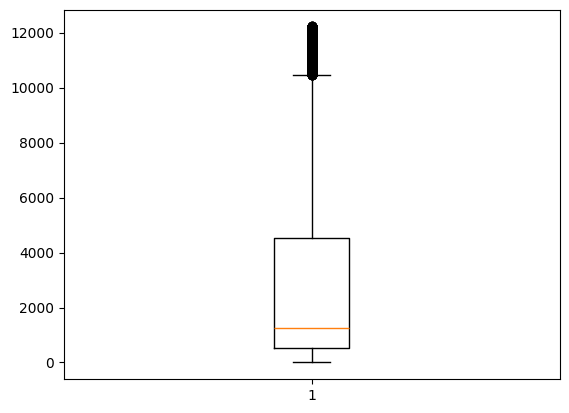

In [46]:
# Строим распредление после удаления выбросов
plt.boxplot(df['PREMIUM'])

<Axes: xlabel='PREMIUM', ylabel='Count'>

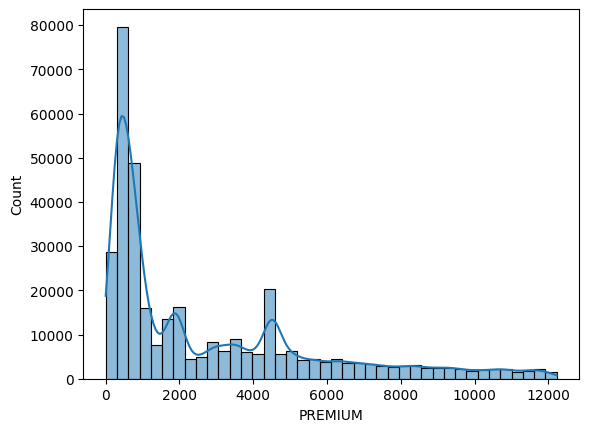

In [47]:
sns.histplot(data=df, x='PREMIUM', bins = 40, kde=True)

### Смотрим распределение данных для колонки OBJECT_ID

{'whiskers': [<matplotlib.lines.Line2D at 0x1260a7f1600>,
 'caps': [<matplotlib.lines.Line2D at 0x1260a7f1b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260a7f1360>],
 'medians': [<matplotlib.lines.Line2D at 0x1260a7f2080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260a7f2320>],
 'means': []}

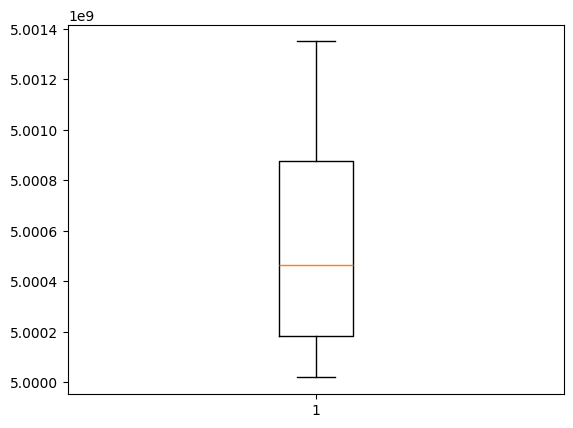

In [48]:
plt.boxplot(df['OBJECT_ID'])

Выбросов в колонке нет, обработку можно пропустить

### Смотрим распределение данных для колонки PROD_YEAR

{'whiskers': [<matplotlib.lines.Line2D at 0x1260be8d720>,
 'caps': [<matplotlib.lines.Line2D at 0x1260be8dc60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260be8d480>],
 'medians': [<matplotlib.lines.Line2D at 0x1260be8e1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260be8e440>],
 'means': []}

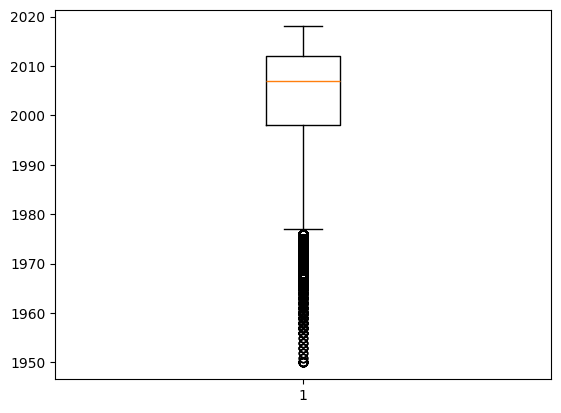

In [49]:
plt.boxplot(df['PROD_YEAR'])

Выбросов в колонке нет, обработку можно пропустить

### Смотрим распределение данных для колонки SEATS_NUM

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Truck'),
  Text(3, 0, 'Bus'),
  Text(4, 0, 'Automobile'),
  Text(5, 0, 'Trailers and semitrailers'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Tanker'),
  Text(9, 0, 'Special construction'),
  Text(10, 0, 'Trade plates')])

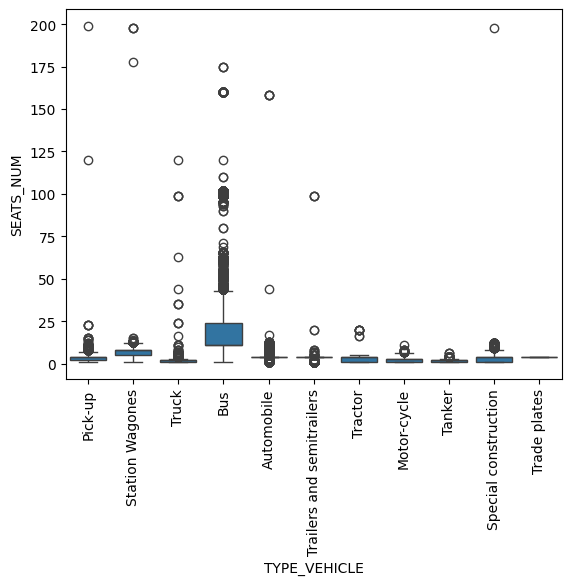

In [50]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Truck'),
  Text(3, 0, 'Bus'),
  Text(4, 0, 'Automobile'),
  Text(5, 0, 'Trailers and semitrailers'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Tanker'),
  Text(9, 0, 'Special construction'),
  Text(10, 0, 'Trade plates')])

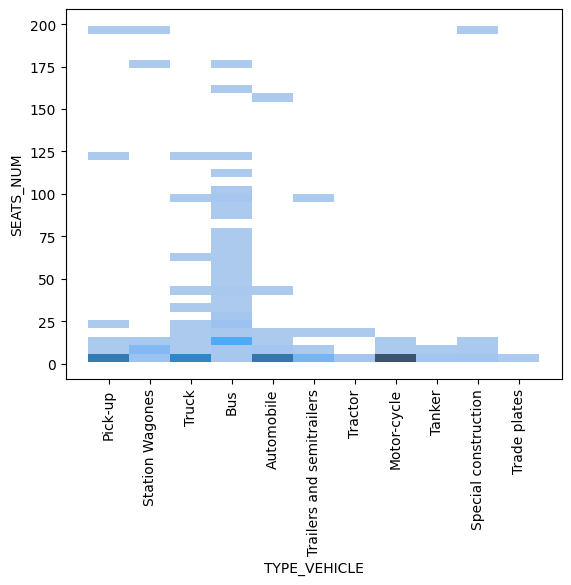

In [51]:
sns.histplot(data=df,  x='TYPE_VEHICLE', y='SEATS_NUM', bins = 40, kde=True)
plt.xticks(rotation = 90)

In [52]:
df[['PREMIUM', 'SEATS_NUM']].corr()

,PREMIUM,SEATS_NUM
PREMIUM,1.00000,0.26984
SEATS_NUM,0.26984,1.00000


In [53]:
#  удаляем выбросы используя метод Z-score
print('До удаления выбросов:', len(df))

Q1 = df.groupby(['TYPE_VEHICLE'])['SEATS_NUM'].quantile(q=.25)
Q3 = df.groupby(['TYPE_VEHICLE'])['SEATS_NUM'].quantile(q=.75)

IQR = Q3 - Q1
 
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

# Применяем границы к каждой строке
df['lower_bound'] = df['TYPE_VEHICLE'].map(lower_bound)
df['upper_bound'] = df['TYPE_VEHICLE'].map(upper_bound)

#Выбросы
df_outlines = (df['SEATS_NUM'] < df['lower_bound']) | (df['SEATS_NUM'] > df['upper_bound'])

# Удаляем выбросы
df = df.loc[~df_outlines]

# Удаляем временные колонки
df = df.drop(columns=['lower_bound', 'upper_bound'])

print('После удаления выбросов:', len(df))

До удаления выбросов: 350170
Нижняя граница: TYPE_VEHICLE
Automobile                   4.0
Bus                         -8.5
Motor-cycle                 -2.0
Pick-up                     -1.0
Special construction        -3.5
Station Wagones              0.5
Tanker                      -0.5
Tractor                     -3.5
Trade plates                 4.0
Trailers and semitrailers    4.0
Truck                       -0.5
Name: SEATS_NUM, dtype: float64
Верхняя граница: TYPE_VEHICLE
Automobile                    4.0
Bus                          43.5
Motor-cycle                   6.0
Pick-up                       7.0
Special construction          8.5
Station Wagones              12.5
Tanker                        3.5
Tractor                       8.5
Trade plates                  4.0
Trailers and semitrailers     4.0
Truck                         3.5
Name: SEATS_NUM, dtype: float64
После удаления выбросов: 336297


In [54]:
df[['PREMIUM', 'SEATS_NUM']].corr()

,PREMIUM,SEATS_NUM
PREMIUM,1.000000,0.180463
SEATS_NUM,0.180463,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

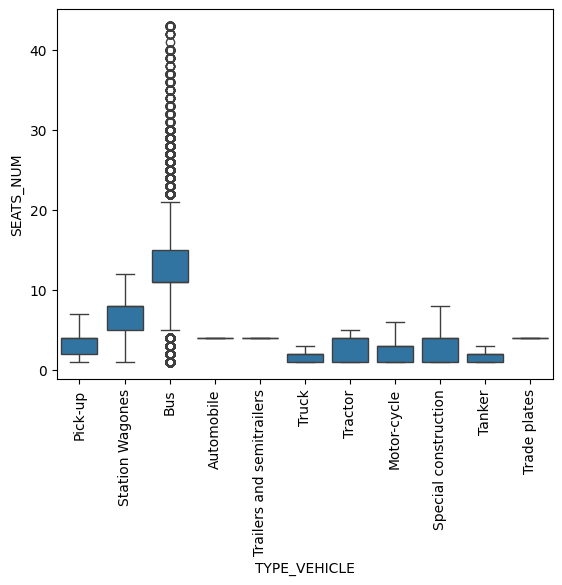

In [55]:
# Смотрим распределение для каждого типа автомобиля после удаления выбросов
sns.boxplot(data = df, x='TYPE_VEHICLE', y='SEATS_NUM')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

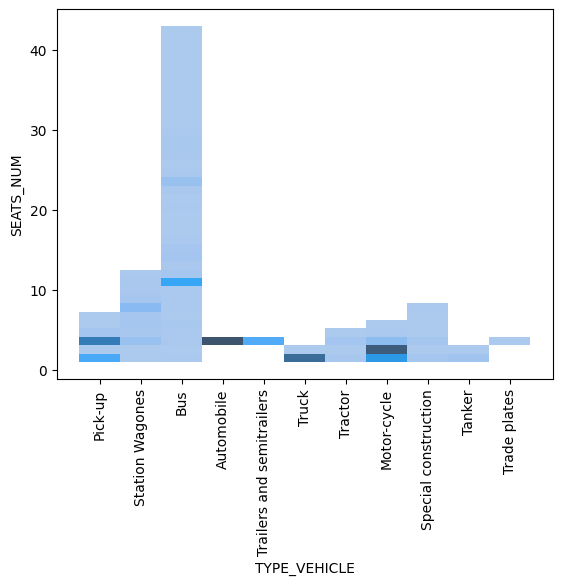

In [56]:
sns.histplot(data=df,  x='TYPE_VEHICLE', y='SEATS_NUM', bins = 40, kde=True)
plt.xticks(rotation = 90)

### Смотрим распределение данных для колонки CARRYING_CAPACITY

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

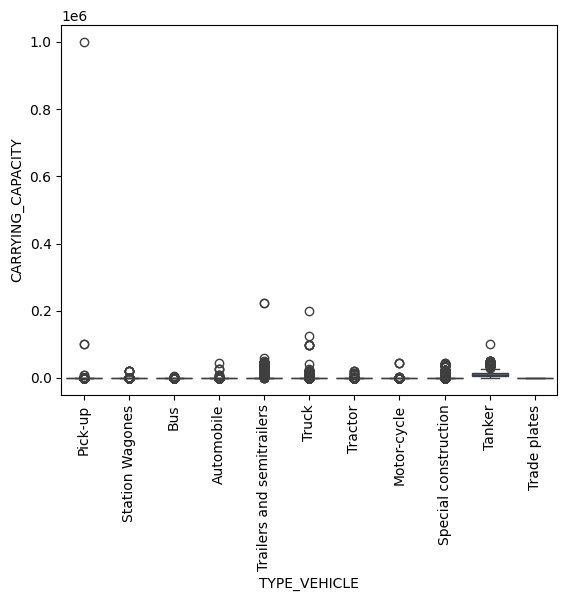

In [57]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

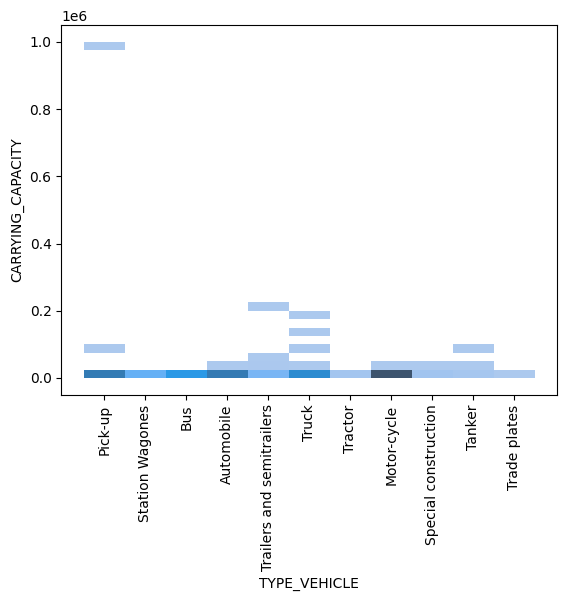

In [58]:
sns.histplot(data=df,  x='TYPE_VEHICLE', y='CARRYING_CAPACITY', bins = 40, kde=True)
plt.xticks(rotation = 90)

имеются выбросы обрабатываем их

In [59]:
df[['PREMIUM', 'CARRYING_CAPACITY']].corr()

,PREMIUM,CARRYING_CAPACITY
PREMIUM,1.000000,0.067278
CARRYING_CAPACITY,0.067278,1.000000


In [60]:
#  удаляем выбросы используя метод Z-score
print('До удаления выбросов:', len(df))

Q1 = df.groupby(['TYPE_VEHICLE'])['CARRYING_CAPACITY'].quantile(q=.25)
Q3 = df.groupby(['TYPE_VEHICLE'])['CARRYING_CAPACITY'].quantile(q=.75)

IQR = Q3 - Q1
 
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

# Применяем границы к каждой строке
df['lower_bound'] = df['TYPE_VEHICLE'].map(lower_bound)
df['upper_bound'] = df['TYPE_VEHICLE'].map(upper_bound)

#Выбросы
df_outlines = (df['CARRYING_CAPACITY'] < df['lower_bound']) | (df['CARRYING_CAPACITY'] > df['upper_bound'])

# Удаляем выбросы
df = df.loc[~df_outlines]

# Удаляем временные колонки
df = df.drop(columns=['lower_bound', 'upper_bound'])

print('После удаления выбросов:', len(df))

До удаления выбросов: 336297
Нижняя граница: TYPE_VEHICLE
Automobile                      7.0
Bus                             1.0
Motor-cycle                     7.0
Pick-up                         2.5
Special construction            2.5
Station Wagones                 7.0
Tanker                      -7500.0
Tractor                         7.0
Trade plates                    7.0
Trailers and semitrailers     -50.0
Truck                        -145.7
Name: CARRYING_CAPACITY, dtype: float64
Верхняя граница: TYPE_VEHICLE
Automobile                       7.0
Bus                             17.0
Motor-cycle                      7.0
Pick-up                         14.5
Special construction            14.5
Station Wagones                  7.0
Tanker                       28500.0
Tractor                          7.0
Trade plates                     7.0
Trailers and semitrailers      670.0
Truck                          261.5
Name: CARRYING_CAPACITY, dtype: float64
После удаления выбросов: 3031

In [61]:
df[['PREMIUM', 'CARRYING_CAPACITY']].corr()

,PREMIUM,CARRYING_CAPACITY
PREMIUM,1.000000,0.052301
CARRYING_CAPACITY,0.052301,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

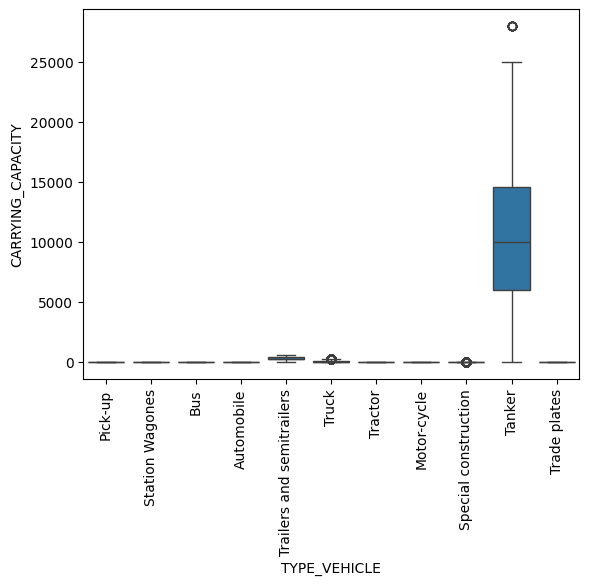

In [62]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='CARRYING_CAPACITY')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Tractor'),
  Text(5, 0, 'Motor-cycle'),
  Text(6, 0, 'Special construction'),
  Text(7, 0, 'Trade plates')])

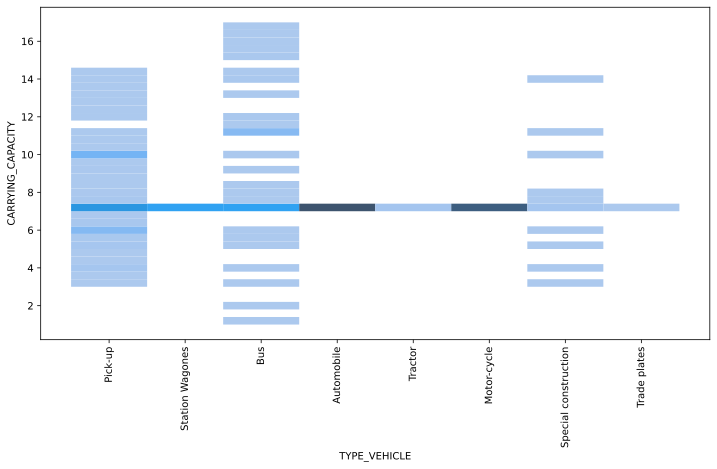

In [97]:
df_copy = df.copy();
df_copy = df_copy[~df_copy['TYPE_VEHICLE'].isin(['Tanker','Trailers and semitrailers','Truck'])]
sns.histplot(data=df_copy,  x='TYPE_VEHICLE', y='CARRYING_CAPACITY', bins = 40, kde=True)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Trade plates')])

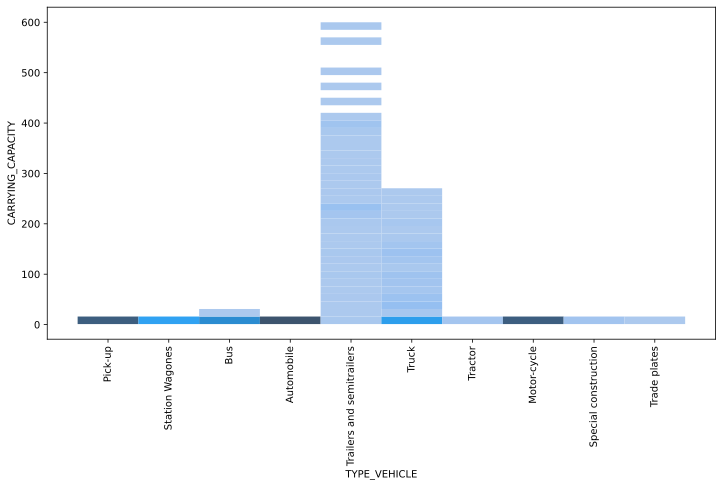

In [95]:
df_copy = df.copy();
df_copy = df_copy[~df_copy['TYPE_VEHICLE'].isin(['Tanker'])]
sns.histplot(data=df_copy,  x='TYPE_VEHICLE', y='CARRYING_CAPACITY', bins = 40, kde=True)
plt.xticks(rotation = 90)

### Смотрим распределение данных для колонки CCM_TON

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

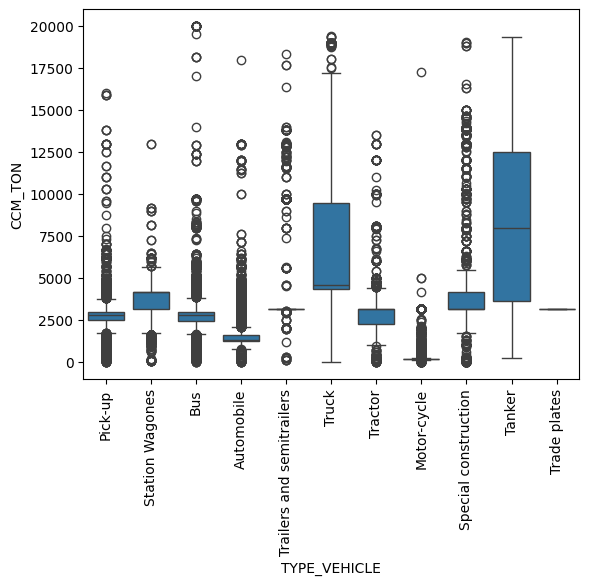

In [64]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='CCM_TON')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

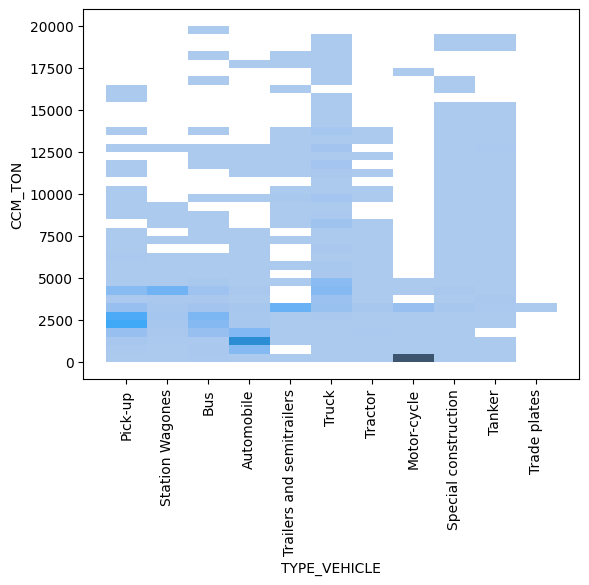

In [65]:
sns.histplot(data=df,  x='TYPE_VEHICLE', y='CCM_TON', bins = 40, kde=True)
plt.xticks(rotation = 90)

In [66]:
df[['PREMIUM', 'CCM_TON']].corr()

,PREMIUM,CCM_TON
PREMIUM,1.000000,0.351704
CCM_TON,0.351704,1.000000


In [67]:
#  удаляем выбросы используя метод Z-score
print('До удаления выбросов:', len(df))

Q1 = df.groupby(['TYPE_VEHICLE'])['CCM_TON'].quantile(q=.25)
Q3 = df.groupby(['TYPE_VEHICLE'])['CCM_TON'].quantile(q=.75)

IQR = Q3 - Q1
 
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)
 
# тогда lower_bound и upper_bound почти равны трем СКО от среднего
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

# Применяем границы к каждой строке
df['lower_bound'] = df['TYPE_VEHICLE'].map(lower_bound)
df['upper_bound'] = df['TYPE_VEHICLE'].map(upper_bound)

#Выбросы
df_outlines = (df['CCM_TON'] < df['lower_bound']) | (df['CCM_TON'] > df['upper_bound'])

# Удаляем выбросы
df = df.loc[~df_outlines]

# Удаляем временные колонки
df = df.drop(columns=['lower_bound', 'upper_bound'])

print('После удаления выбросов:', len(df))

До удаления выбросов: 303167
Нижняя граница: TYPE_VEHICLE
Automobile                    755.00
Bus                          1636.00
Motor-cycle                   133.25
Pick-up                      1720.00
Special construction         1636.50
Station Wagones              1636.50
Tanker                      -9750.00
Tractor                       985.50
Trade plates                 3153.00
Trailers and semitrailers    3153.00
Truck                       -3379.00
Name: CCM_TON, dtype: float64
Верхняя граница: TYPE_VEHICLE
Automobile                    2075.00
Bus                           3796.00
Motor-cycle                    240.05
Pick-up                       3768.00
Special construction          5680.50
Station Wagones               5680.50
Tanker                       25850.00
Tractor                       4453.50
Trade plates                  3153.00
Trailers and semitrailers     3153.00
Truck                        17189.00
Name: CCM_TON, dtype: float64
После удаления выбросов: 25

In [68]:
df[['PREMIUM', 'CCM_TON']].corr()

,PREMIUM,CCM_TON
PREMIUM,1.000000,0.352177
CCM_TON,0.352177,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

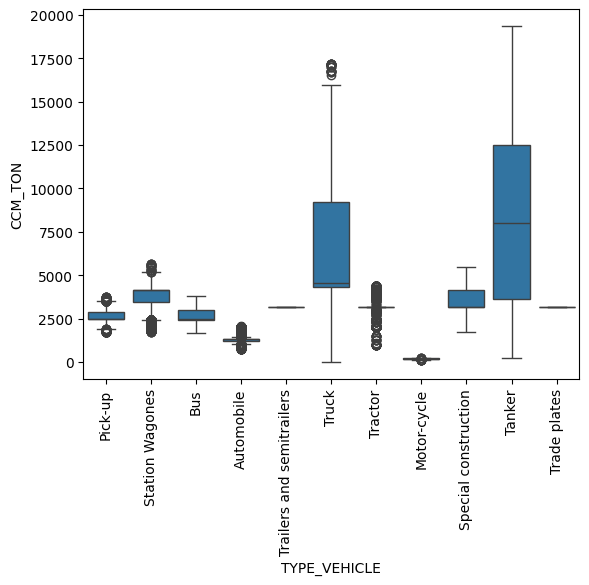

In [69]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='CCM_TON')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

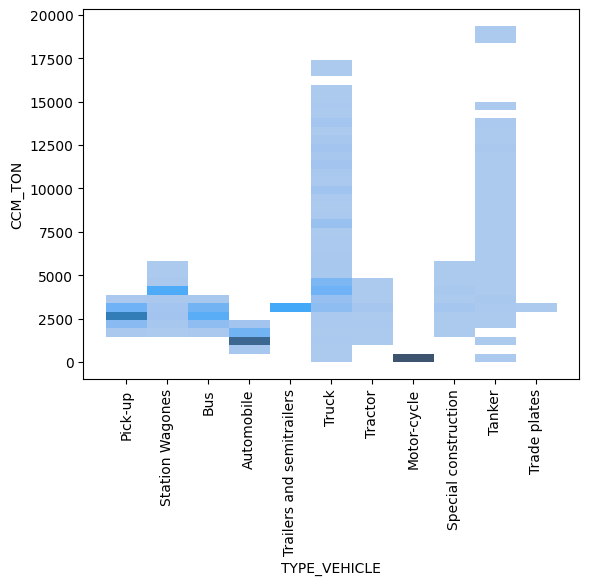

In [70]:
sns.histplot(data=df,  x='TYPE_VEHICLE', y='CCM_TON', bins = 40, kde=True)
plt.xticks(rotation = 90)

### Смотрим распределение данных для колонки CLAIM_PAID

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Pick-up'),
  Text(1, 0, 'Station Wagones'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Automobile'),
  Text(4, 0, 'Trailers and semitrailers'),
  Text(5, 0, 'Truck'),
  Text(6, 0, 'Tractor'),
  Text(7, 0, 'Motor-cycle'),
  Text(8, 0, 'Special construction'),
  Text(9, 0, 'Tanker'),
  Text(10, 0, 'Trade plates')])

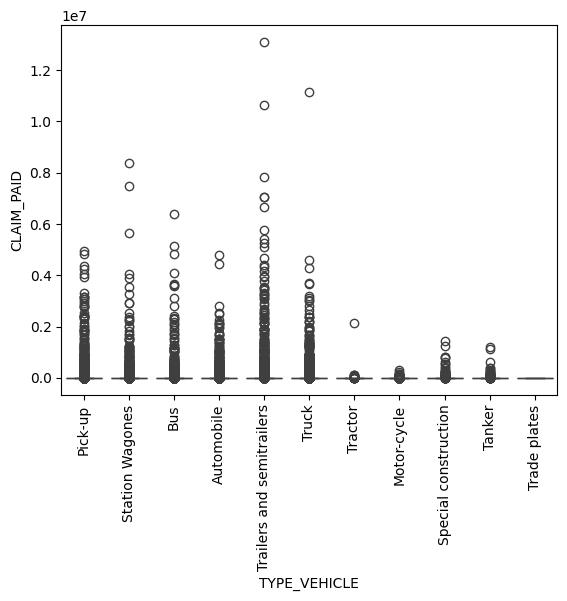

In [71]:
# Смотрим распределение для каждого типа автомобиля
sns.boxplot(data = df, x='TYPE_VEHICLE', y='CLAIM_PAID')
plt.xticks(rotation = 90)

Выбросы пока тут не убираем

## Аналитика зависимостей

In [72]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
import pandas as pd

In [73]:
#Смотрим информацию по датасету 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255395 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SEX                255395 non-null  object        
 1   INSR_BEGIN         255395 non-null  datetime64[ns]
 2   INSR_END           255395 non-null  datetime64[ns]
 3   EFFECTIVE_YR       255395 non-null  float64       
 4   INSR_TYPE          255395 non-null  object        
 5   INSURED_VALUE      255395 non-null  float64       
 6   PREMIUM            255395 non-null  float64       
 7   OBJECT_ID          255395 non-null  int64         
 8   PROD_YEAR          255395 non-null  float64       
 9   SEATS_NUM          255395 non-null  float64       
 10  CARRYING_CAPACITY  255395 non-null  float64       
 11  TYPE_VEHICLE       255395 non-null  object        
 12  CCM_TON            255395 non-null  float64       
 13  MAKE               255395 non-null  object       

<Axes: xlabel='PREMIUM', ylabel='Density'>

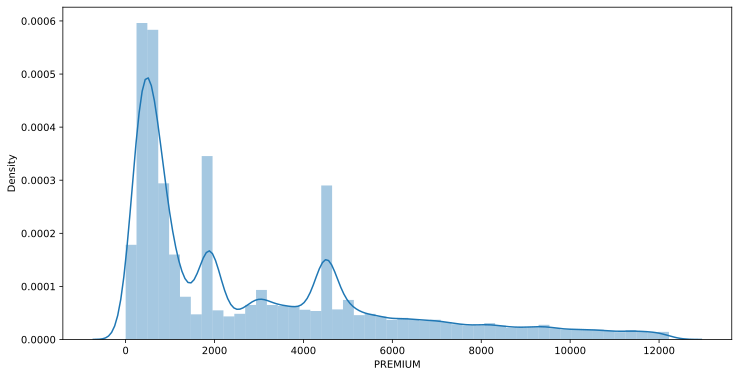

In [74]:
# Смотрим на распредление целевой переменной - страховой премии
sns.distplot(df.PREMIUM)

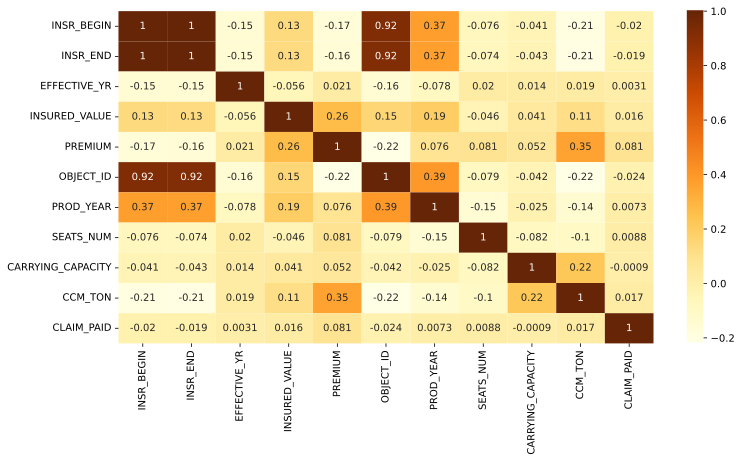

In [75]:
#Строим матрицу корреляции для числовых переменных
corr_matrix = df.drop(['TYPE_VEHICLE','USAGE','SEX','MAKE', 'INSR_TYPE'], axis=1).corr()
sns.heatmap(corr_matrix,cmap="YlOrBr",annot=True);

Из матрицы корреляции видно что можно удалить следующие колонки: OBJECT_ID, INSUR_BEGIN, INSUR_END

In [76]:
df = df.drop(['INSR_BEGIN','INSR_END','OBJECT_ID'], axis=1)

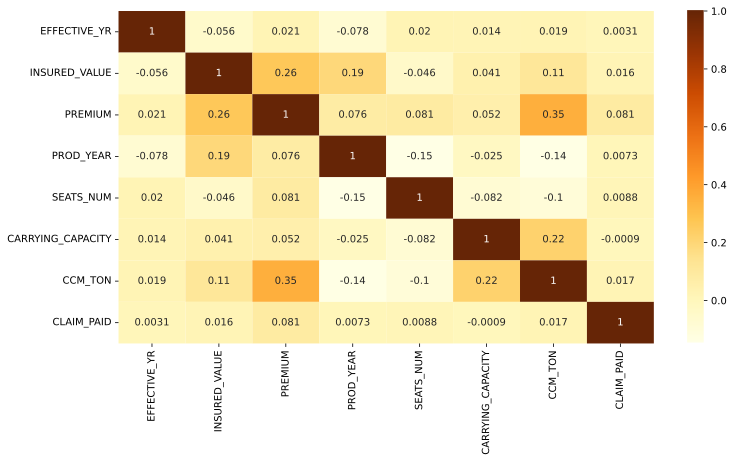

In [77]:
#Строим матрицу корреляции повторно
corr_matrix = df.drop(['TYPE_VEHICLE','USAGE','SEX','MAKE', 'INSR_TYPE'], axis=1).corr()
sns.heatmap(corr_matrix,cmap="YlOrBr",annot=True);

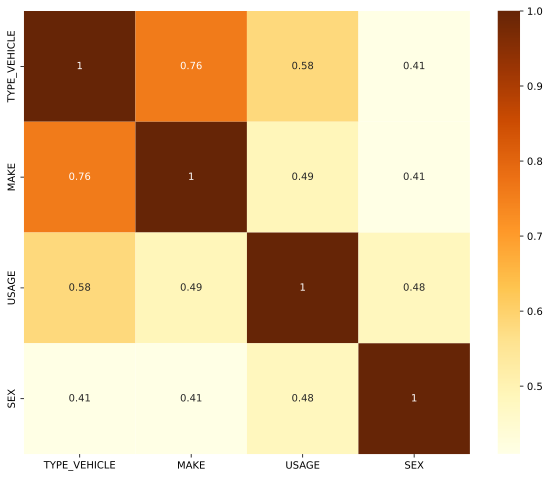

In [78]:
# Строим матрицу корреляции для категориальных переменных
import scipy.stats as stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = ['TYPE_VEHICLE', 'MAKE', 'USAGE', 'SEX']

correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Преобразуем в числовой тип данных
correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.show()

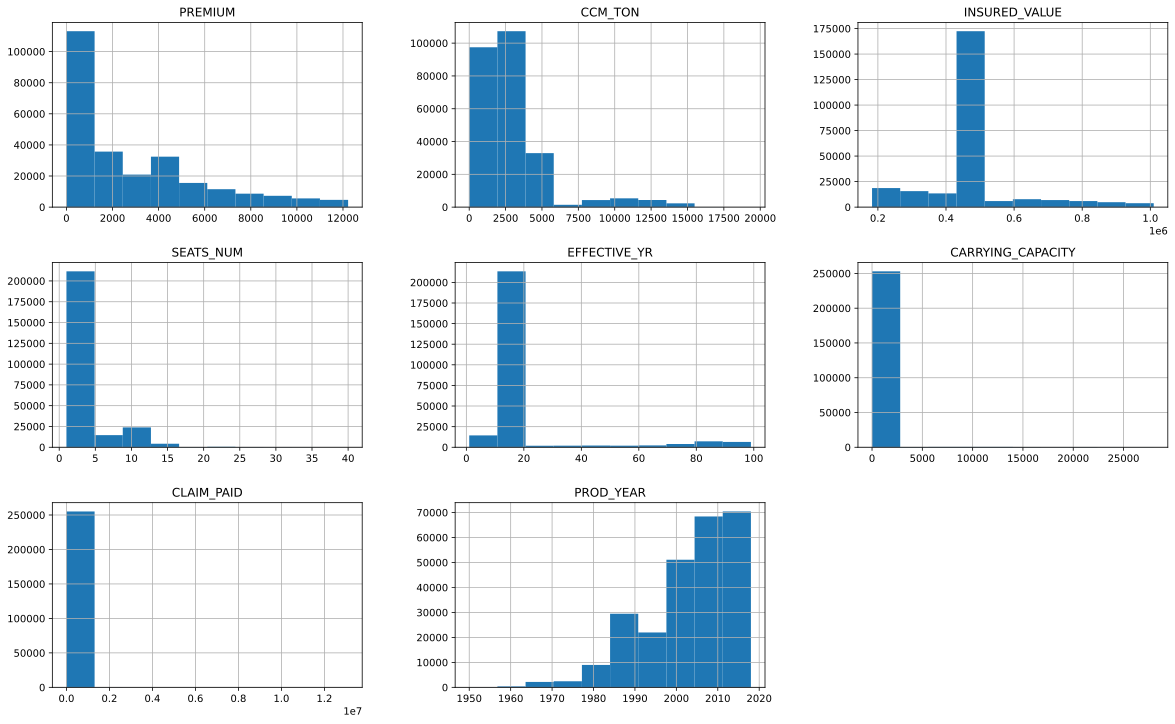

In [79]:
features = list(set(df.columns) - set(['TYPE_VEHICLE','USAGE','GENDER','MAKE']))

df[features].hist(figsize=(20,12));

In [80]:
df.groupby(['TYPE_VEHICLE'])['PREMIUM'].agg([np.mean]).sort_values(by='mean', ascending=False).T

TYPE_VEHICLE,Trailers and semitrailers,Station Wagones,Tractor,Truck,Tanker,Pick-up,Bus,Automobile,Special construction,Trade plates,Motor-cycle
mean,5066.857688,4417.574888,4365.18365,4318.651381,3860.612355,3282.133194,3171.079923,2309.960784,2229.620147,1031.0,394.871638


In [81]:
df.groupby(['USAGE'])['PREMIUM'].agg([np.mean]).sort_values(by='mean', ascending=False).T

USAGE,Agricultural Any Farm,General Cartage,Ambulance,Own Goods,Agricultural Own Farm,Own service,Fire fighting,Private,Car Hires,Special Construction,Learnes,Fare Paying Passengers,Taxi,Others
mean,5045.094684,4520.761425,3926.043278,3649.707353,3378.194658,2902.055052,2724.69,2714.384748,2186.082893,1792.372221,1773.214534,1411.412513,1069.781105,680.229198


In [82]:
df.groupby(['SEX'])['PREMIUM'].agg([np.mean]).sort_values(by='mean', ascending=False).T

SEX,Legal Entity,Female,Male
mean,3852.61851,2373.67945,2186.7149


In [83]:
df.groupby(['MAKE'])['PREMIUM'].agg([np.mean]).sort_values(by='mean', ascending=False).T

MAKE,VERSATILE,PEJOT,AMI,MAMMUT,CHINA ZENGIZO,SUV,ASNAKE ENGNERING,PEUGEOUT,GENLION,WATERING CAR,...,APACHE,POWER PLUS DOZER,M/CYCLE,APPACH EBS,RTR,APACH,KANIYO,M/CYCIE,ARTICULATED TRACTOR,TECHALE
mean,12052.9,11898.05,11794.1,11747.0,11359.75,11338.92,10862.975,10783.4,10450.59,10323.343125,...,225.153846,224.4,221.2,221.2,221.2,221.2,221.175,216.2,212.47,169.3


In [84]:
df.describe()

,EFFECTIVE_YR,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID
count,255395.000000,2.553950e+05,255395.000000,255395.000000,255395.000000,255395.000000,255395.000000,2.553950e+05
mean,19.568997,4.885436e+05,2912.632276,2003.142861,4.255800,137.273545,2761.427200,6.368590e+03
std,19.722294,1.374974e+05,2928.923997,10.898465,3.257778,1214.324123,2594.431422,1.025868e+05
min,1.000000,1.828387e+05,0.740000,1950.000000,1.000000,1.000000,2.000000,0.000000e+00
25%,11.000000,4.931063e+05,541.950000,1997.000000,2.000000,7.000000,1295.000000,0.000000e+00
50%,14.000000,4.931063e+05,1809.900000,2006.000000,4.000000,7.000000,2494.000000,0.000000e+00
75%,17.000000,4.931063e+05,4515.150000,2012.000000,4.000000,7.000000,3153.000000,0.000000e+00
max,99.000000,1.009996e+06,12222.720000,2018.000000,40.000000,28000.000000,19360.000000,1.310318e+07


In [85]:
df

,SEX,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,Legal Entity,8.0,Commercial,519755.22,7209.140,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
1,Legal Entity,8.0,Commercial,519755.22,7203.890,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
2,Legal Entity,8.0,Commercial,519755.22,7045.804,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
3,Legal Entity,8.0,Commercial,519755.22,287.250,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00
4,Legal Entity,8.0,Commercial,285451.24,4286.900,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508494,Legal Entity,12.0,Commercial,493106.31,294.510,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508495,Legal Entity,12.0,Commercial,493106.31,299.510,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508496,Legal Entity,12.0,Commercial,493106.31,294.510,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00
508497,Legal Entity,12.0,Commercial,493106.31,294.510,2018.0,4.0,7.0,Pick-up,2400.0,TOYOTA,Own Goods,0.00


In [86]:
learn_dataframe = df.copy()

In [87]:
#Обрабатываем категориальные переменные через OneHot Encoding

# Выделение категориальных колонок
categorical_columns = ['TYPE_VEHICLE', 'MAKE', 'USAGE', 'SEX', 'INSR_TYPE']

# Создание OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

# Применение OneHotEncoder к категориальным колонкам
encoded_data = encoder.fit_transform(learn_dataframe[categorical_columns])

# Преобразование закодированных данных в DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Объединение закодированных данных с исходным DataFrame
learn_dataframe = learn_dataframe.drop(columns=categorical_columns)
learn_dataframe = pd.concat([learn_dataframe, encoded_df], axis=1)

# Заполнение пропущенных значений
learn_dataframe = learn_dataframe.fillna(learn_dataframe.mean())

learn_dataframe

,EFFECTIVE_YR,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID,TYPE_VEHICLE_Automobile,TYPE_VEHICLE_Bus,...,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi,SEX_Female,SEX_Legal Entity,SEX_Male,INSR_TYPE_Commercial,INSR_TYPE_Motor Trade Road Risk,INSR_TYPE_Private
0,8.000000,519755.220000,7209.140000,2007.000000,4.0000,6.000000,3153.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.000000,519755.220000,7203.890000,2007.000000,4.0000,6.000000,3153.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8.000000,519755.220000,7045.804000,2007.000000,4.0000,6.000000,3153.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,8.000000,519755.220000,287.250000,2007.000000,4.0000,6.000000,3153.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,8.000000,285451.240000,4286.900000,2010.000000,4.0000,7.000000,2494.0000,19894.430000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255388,19.568997,488543.588943,2912.632276,2003.142861,4.2558,137.273545,2761.4272,6368.590388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
255390,19.568997,488543.588943,2912.632276,2003.142861,4.2558,137.273545,2761.4272,6368.590388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
255391,19.568997,488543.588943,2912.632276,2003.142861,4.2558,137.273545,2761.4272,6368.590388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
255392,19.568997,488543.588943,2912.632276,2003.142861,4.2558,137.273545,2761.4272,6368.590388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [88]:
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(learn_dataframe), columns=learn_dataframe.columns)

print("Min-Max нормализация:\n")
df_min_max_scaled

Min-Max нормализация:



,EFFECTIVE_YR,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,CLAIM_PAID,TYPE_VEHICLE_Automobile,TYPE_VEHICLE_Bus,...,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi,SEX_Female,SEX_Legal Entity,SEX_Male,INSR_TYPE_Commercial,INSR_TYPE_Motor Trade Road Risk,INSR_TYPE_Private
0,0.071429,0.407318,0.589790,0.838235,0.076923,0.000179,0.162775,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.071429,0.407318,0.589360,0.838235,0.076923,0.000179,0.162775,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.071429,0.407318,0.576426,0.838235,0.076923,0.000179,0.162775,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.071429,0.407318,0.023442,0.838235,0.076923,0.000179,0.162775,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.071429,0.124054,0.350693,0.882353,0.076923,0.000214,0.128732,0.001518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381864,0.189480,0.369585,0.238250,0.781513,0.083482,0.004867,0.142547,0.000486,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
381865,0.189480,0.369585,0.238250,0.781513,0.083482,0.004867,0.142547,0.000486,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
381866,0.189480,0.369585,0.238250,0.781513,0.083482,0.004867,0.142547,0.000486,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
381867,0.189480,0.369585,0.238250,0.781513,0.083482,0.004867,0.142547,0.000486,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
